# DSC 550 

### Week 2:  Exercise 2.2

Author: Kimberly Cable<br>
Date: 6-18-2022

### Using a data set of your choice, write an introduction explaining the data set.

**Reference:** https://www.kaggle.com/datasets/planejane/national-park-trails

This is a list of National Park trails in the United States.  It shows where they are located, details about the trail, things to do on the trail, and visitor information.

#### Data Dictionary

* trail_id: ID of trail
* name: Name of the trail
* area_name: Which National Park the trail is located
* city_name: City where the trail is located
* state_name: State where the trail is located
* country_name: Country where the trail is located
* geoloc: latitude and longitude where the trail is located
* popularity: populatrity scale
* length: length of trail in miles
* elevation_gain: elevation gain of trail in feet
* difficulty_rating: Scale 1 to 10 on how difficult the trail is
* route_type: out and back, loop, point to point
* visitor_usage: 1 - 4: light, moderate, heavy, very heavy
* avg_rating: 1 to 5 stars - can be 1/2s
* num_reviews: number of reviews
* features: array of features
* activities: array of activities
* units: Inches or meters (i or m)


### Identify a question or question(s) that you would like to explore in your data set.

1. Number of trails in each National Park?
2. What is the popularity of a trail compared to its elevation gain?
3. What are the route types per length?

### Create at least three graphs that help answer these questions. Make sure your graphs are clearly readable and are labeled appropriately and professionally.

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read data file
try:
    trails_df = pd.read_csv("AllTrails data - nationalpark.csv")
except Exception:
    print("There was an error reading the Trails file")
    
trails_df.head()

,trail_id,name,area_name,city_name,state_name,country_name,_geoloc,popularity,length,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,features,activities,units
0,10020048,Harding Ice Field Trail,Kenai Fjords National Park,Seward,Alaska,United States,"{'lat': 60.18852, 'lng': -149.63156}",24.8931,15610.598,1161.8976,5,out and back,3.0,5.0,423,"['dogs-no', 'forest', 'river', 'views', 'water...","['birding', 'camping', 'hiking', 'nature-trips...",i
1,10236086,Mount Healy Overlook Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73049, 'lng': -148.91968}",18.0311,6920.162,507.7968,3,out and back,1.0,4.5,260,"['dogs-no', 'forest', 'views', 'wild-flowers',...","['birding', 'camping', 'hiking', 'nature-trips...",i
2,10267857,Exit Glacier Trail,Kenai Fjords National Park,Seward,Alaska,United States,"{'lat': 60.18879, 'lng': -149.631}",17.7821,2896.812,81.9912,1,out and back,3.0,4.5,224,"['dogs-no', 'partially-paved', 'views', 'wildl...","['hiking', 'walking']",i
3,10236076,Horseshoe Lake Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73661, 'lng': -148.915}",16.2674,3379.614,119.7864,1,loop,2.0,4.5,237,"['dogs-no', 'forest', 'lake', 'kids', 'views',...","['birding', 'hiking', 'nature-trips', 'trail-r...",i
4,10236082,Triple Lakes Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73319, 'lng': -148.89682}",12.5935,29772.790,1124.7120,5,out and back,1.0,4.5,110,"['dogs-no', 'lake', 'views', 'wild-flowers', '...","['birding', 'fishing', 'hiking', 'nature-trips...",i


## Data Cleaning

In [3]:
# get basic information about the columns
trails_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3313 entries, 0 to 3312
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   trail_id           3313 non-null   int64  
 1   name               3313 non-null   object 
 2   area_name          3313 non-null   object 
 3   city_name          3313 non-null   object 
 4   state_name         3313 non-null   object 
 5   country_name       3313 non-null   object 
 6   _geoloc            3313 non-null   object 
 7   popularity         3313 non-null   float64
 8   length             3313 non-null   float64
 9   elevation_gain     3313 non-null   float64
 10  difficulty_rating  3313 non-null   int64  
 11  route_type         3313 non-null   object 
 12  visitor_usage      3060 non-null   float64
 13  avg_rating         3313 non-null   float64
 14  num_reviews        3313 non-null   int64  
 15  features           3313 non-null   object 
 16  activities         3313 

In [4]:
# Change Hawaii to correct state and country
trails_df['country_name'] = trails_df['country_name'].apply(lambda x: x.replace("Hawaii", "United States"))
trails_df['state_name'] = trails_df['state_name'].apply(lambda x: x.replace("Maui", "Hawaii"))

In [5]:
#Convert meters to feet for trails in Hawaii and inches to feet for others
def convert (units, length):
    """ 
    Convert meters and inches to feet
    
    Args:
        units (string): i or m
        length (float): length
        
    Returns:
        length (float): length in inches
    """
    if units == 'm':
        return length * 39.3701 * 0.08333
    else:
        return length * 0.08333

In [6]:
#Create new length column in feet
trails_df['length_feet'] = trails_df.apply(lambda x: convert(units = x['units'], length = x['length']), axis = 1)

#drop original length column
trails_df.drop(['length'], axis = 1, inplace = True)

In [7]:
trails_df.head()

,trail_id,name,area_name,city_name,state_name,country_name,_geoloc,popularity,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,features,activities,units,length_feet
0,10020048,Harding Ice Field Trail,Kenai Fjords National Park,Seward,Alaska,United States,"{'lat': 60.18852, 'lng': -149.63156}",24.8931,1161.8976,5,out and back,3.0,5.0,423,"['dogs-no', 'forest', 'river', 'views', 'water...","['birding', 'camping', 'hiking', 'nature-trips...",i,1300.831131
1,10236086,Mount Healy Overlook Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73049, 'lng': -148.91968}",18.0311,507.7968,3,out and back,1.0,4.5,260,"['dogs-no', 'forest', 'views', 'wild-flowers',...","['birding', 'camping', 'hiking', 'nature-trips...",i,576.657099
2,10267857,Exit Glacier Trail,Kenai Fjords National Park,Seward,Alaska,United States,"{'lat': 60.18879, 'lng': -149.631}",17.7821,81.9912,1,out and back,3.0,4.5,224,"['dogs-no', 'partially-paved', 'views', 'wildl...","['hiking', 'walking']",i,241.391344
3,10236076,Horseshoe Lake Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73661, 'lng': -148.915}",16.2674,119.7864,1,loop,2.0,4.5,237,"['dogs-no', 'forest', 'lake', 'kids', 'views',...","['birding', 'hiking', 'nature-trips', 'trail-r...",i,281.623235
4,10236082,Triple Lakes Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73319, 'lng': -148.89682}",12.5935,1124.7120,5,out and back,1.0,4.5,110,"['dogs-no', 'lake', 'views', 'wild-flowers', '...","['birding', 'fishing', 'hiking', 'nature-trips...",i,2480.966591


### Histogram of columns

array([[<AxesSubplot:title={'center':'trail_id'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'elevation_gain'}>],
       [<AxesSubplot:title={'center':'difficulty_rating'}>,
        <AxesSubplot:title={'center':'visitor_usage'}>,
        <AxesSubplot:title={'center':'avg_rating'}>],
       [<AxesSubplot:title={'center':'num_reviews'}>,
        <AxesSubplot:title={'center':'length_feet'}>, <AxesSubplot:>]],
      dtype=object)

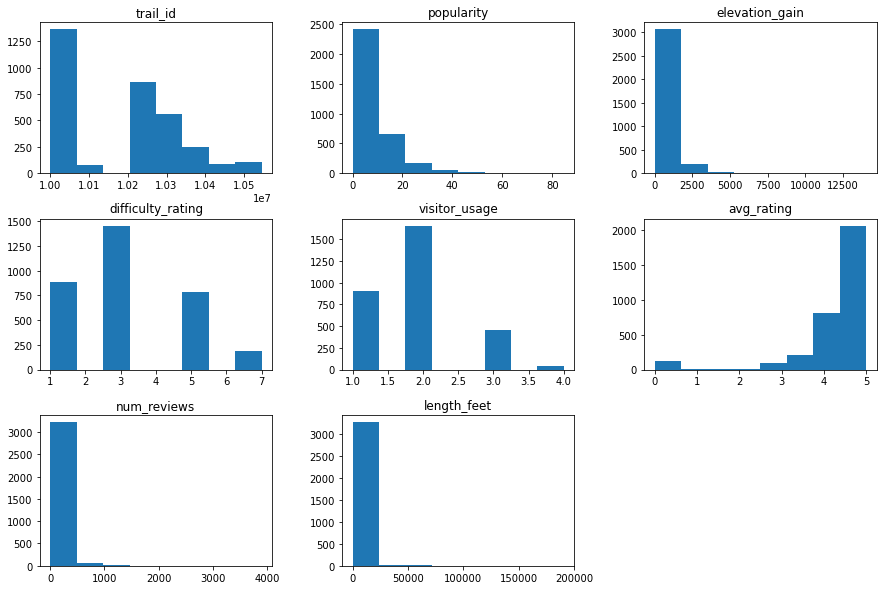

In [8]:
# Create histogram of numeric columns in dataset
trails_df.hist(bins = 8, figsize = (15, 10), grid = False)

Most of the data looks skewed but I expected the data not to be normal.

### Number of trails in each National Park

Text(0, 0.5, 'Number of Trails')

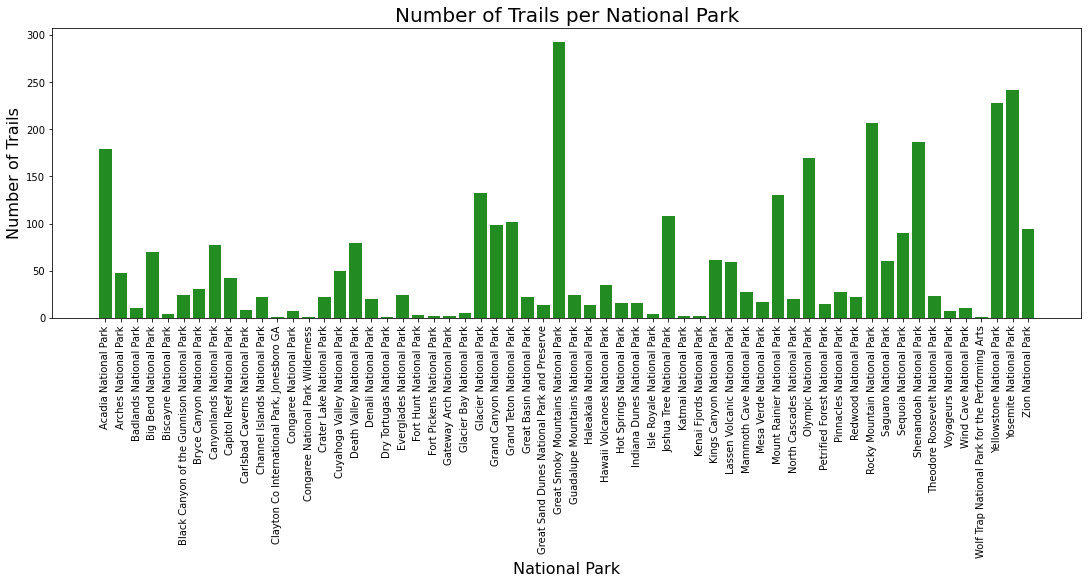

In [9]:
# Count the number of trails per National Park
by_park_count = trails_df.groupby('area_name')['name'].count()

# Split of the parks and the counts
parks = list(by_park_count.keys())
counts = list(by_park_count.values)

# Create figure
fig, ax = plt.subplots(1, 1, figsize = (15, 8), layout = 'constrained')

# Create barchart
ax.bar(parks, counts, width = .8, color = 'ForestGreen')

# Customize labels
ax.set_xticks(parks)
ax.set_xticklabels(parks, rotation = 90)
ax.set_title("Number of Trails per National Park", fontsize = 20)
ax.set_xlabel("National Park", fontsize = 16)
ax.set_ylabel("Number of Trails", fontsize = 16)

This is a graph to visualize the number of trails in each of the National Parks. It would be interesting to find out the number of trails per park to the size of the park itself.

### Popularity of a trail to its Elevation Gain

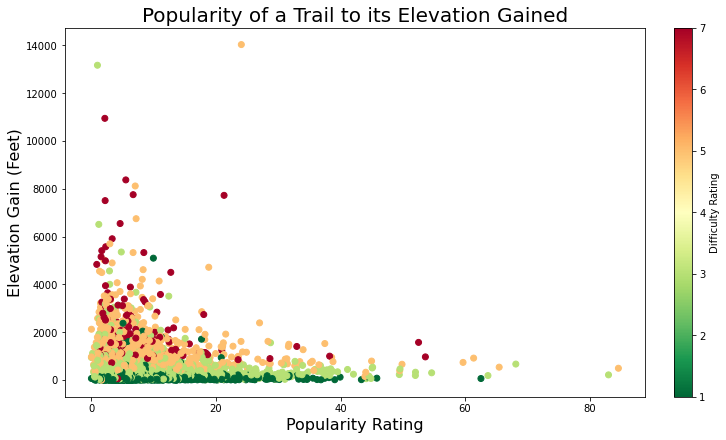

In [10]:
# Create figure
fig, ax = plt.subplots(1, 1, figsize = (10, 6), layout = 'constrained')

# Get popularity and elevation gain columns
popularity = trails_df['popularity']
difficulty = trails_df['elevation_gain']

# Group trails by difficulty rating
difficulty_grouped = trails_df.groupby('difficulty_rating')

# Create scatterplt
scatter = ax.scatter(popularity, difficulty, c = trails_df['difficulty_rating'], cmap = 'RdYlGn_r')

# Cusomize labels
ax.set_title("Popularity of a Trail to its Elevation Gained", fontsize = 20)
ax.set_xlabel("Popularity Rating", fontsize = 16)
ax.set_ylabel("Elevation Gain (Feet)", fontsize = 16)

# Create colorbar
fig.colorbar(scatter, label = 'Difficulty Rating')

This graph visualizes the popularity of a trail to its elevation gain colored by the difficulty rating. The more difficult the trail the higher the elevation gain and the flatter the trail the easier the trail is.  The popularity is skewed more to most trails not being popular. Also, the more popular trails are relatively low on the elevation gain.

### Length of trail per Route Type by Visitor Usage

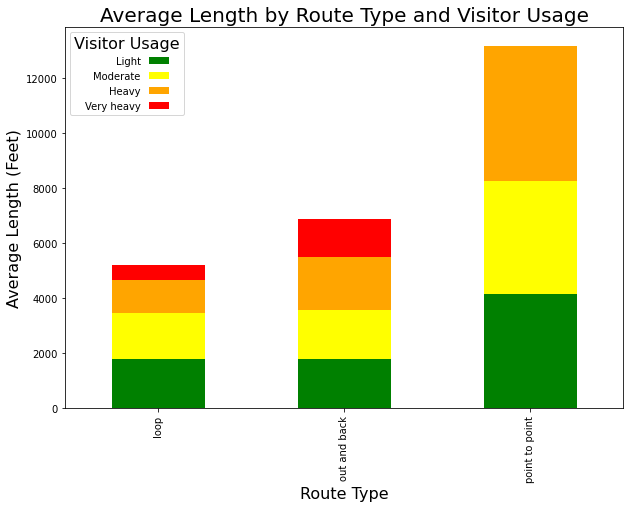

In [11]:
# Group length by route type and visitor usage
grouped_route_type = trails_df.groupby(['route_type', 'visitor_usage'])['length_feet'].mean()

# Initialize colors
colors = {1: 'green', 2:'yellow', 3:'orange', 4:'red'}

# Create stacked bar chart
ax = grouped_route_type.unstack().plot(kind = 'bar', stacked = True, figsize = (10, 7), color = colors)

# Customize labels
ax.set_xlabel('Route Type', fontsize = 16)
ax.set_ylabel('Average Length (Feet)', fontsize = 16)
ax.set_title('Average Length by Route Type and Visitor Usage', fontsize = 20)

# Customize legend
ax.legend(markerfirst = False, title = 'Visitor Usage', title_fontsize = 16, labels = ('Light', 'Moderate', 'Heavy', 'Very heavy'))

# Display chart
plt.show()

Most trails are point to point and longer distances. The heaviest traffic is on the out and back routes and then the loop routes but the point to point does see a lot of visitors as well.  The point to point also has the longest trails.

### Popularity of Trails per State

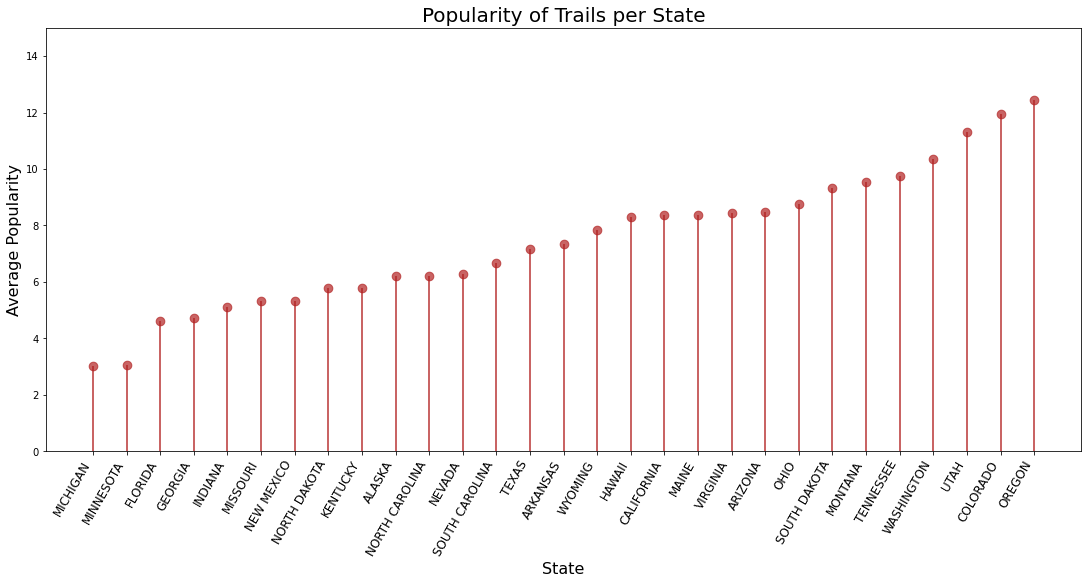

In [12]:
# Group trails by state and sort by popularity
by_popularity_state = trails_df[['popularity', 'state_name']].groupby('state_name').apply(lambda x: x.mean(numeric_only = True))
by_popularity_state.sort_values('popularity', inplace = True)
by_popularity_state.reset_index(inplace = True)

# Create figure
fig, ax = plt.subplots(figsize = (15, 8), layout = 'constrained')

# Add Vertical lines for states popularity
ax.vlines(x = by_popularity_state.index, ymin = 0, ymax = by_popularity_state.popularity, color = 'firebrick', alpha = 0.7, linewidth = 2)

# Create scatter plot for states popularity
ax.scatter(x = by_popularity_state.index, y = by_popularity_state.popularity, s = 75, color = 'firebrick', alpha = 0.7)

# Customize labels
ax.set_title("Popularity of Trails per State", fontsize = 20)
ax.set_xlabel("State", fontsize = 16)
ax.set_ylabel("Average Popularity", fontsize = 16)
ax.set_xticks(by_popularity_state.index)
ax.set_xticklabels(by_popularity_state.state_name.str.upper(), rotation = 60, fontdict={'horizontalalignment': 'right', 'size': 12})
ax.set_ylim(0, 15)

# Display chart
plt.show()

This graph visualizes the most popular states for their trails.

### Correlations

In [13]:
# Get pearsons correlation of numeric columns and round to 2 decimal places
pearson_corr = trails_df.corr(method = 'pearson').round(2)
pearson_corr

,trail_id,popularity,elevation_gain,difficulty_rating,visitor_usage,avg_rating,num_reviews,length_feet
trail_id,1.00,-0.34,0.07,0.05,-0.14,-0.06,-0.19,-0.02
popularity,-0.34,1.00,-0.12,-0.06,0.46,0.29,0.86,-0.06
elevation_gain,0.07,-0.12,1.00,0.55,-0.03,-0.02,-0.10,0.27
difficulty_rating,0.05,-0.06,0.55,1.00,-0.10,0.08,-0.03,0.19
visitor_usage,-0.14,0.46,-0.03,-0.10,1.00,0.13,0.40,-0.01
avg_rating,-0.06,0.29,-0.02,0.08,0.13,1.00,0.15,-0.00
num_reviews,-0.19,0.86,-0.10,-0.03,0.40,0.15,1.00,-0.05
length_feet,-0.02,-0.06,0.27,0.19,-0.01,-0.00,-0.05,1.00


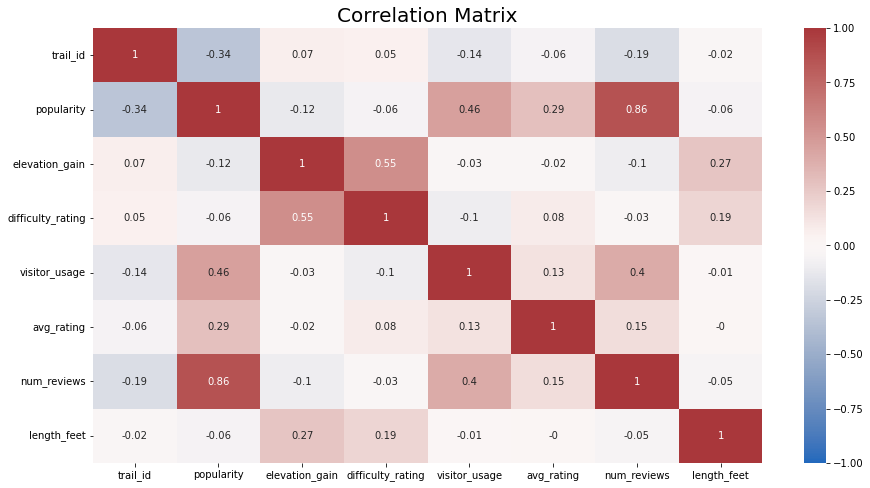

In [14]:
# import library
import seaborn as sns

# create figure
plt.figure(figsize = (15, 8))

# Customize title
plt.title("Correlation Matrix", fontsize = 20)

# Create heatmap of correlations
sns.heatmap(pearson_corr, annot = True, vmax = 1, vmin = -1, center = 0, cmap = 'vlag')

# display chart
plt.show()

The only correlation looks like number of reviews to popularity. Elevation gain and difficulty rating and visitor usage and popularity are modestly correlated.

### Map of National Parks with number of trails per park

In [15]:
# import library
import folium

# get US map
url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
state_geo = f"{url}/us-states.json"

In [16]:
# Create map
m = folium.Map(location=[48, -102], zoom_start=3)
folium.TileLayer('stamenterrain').add_to(m)

In [17]:
# Create dataframe of National Parks and location
locations_df = pd.DataFrame().assign(National_Park = trails_df['area_name'], Location = trails_df['_geoloc']) 

# Get number of trails per National Park
locations_df['Trails_Count'] = locations_df.groupby('National_Park').transform('count')

# Drop duplicate National Parks
locations_df.drop_duplicates(subset = ['National_Park'], keep = 'first', inplace = True)

# Reset index
locations_df = locations_df.reset_index(drop = True)

# Split latitude and Longitude
locations_df[['lat','lng']] = locations_df['Location'].apply(lambda x: pd.Series(str(x).split(",")))
locations_df['lat'] = locations_df['lat'].apply(lambda x: (x.split(':')[1].split()[-1])).astype(float)
locations_df['lng'] = locations_df['lng'].apply(lambda x: (x.split(':')[1].split()[-1][:-1])).astype(float)

# Display first 5
locations_df.head()

,National_Park,Location,Trails_Count,lat,lng
0,Kenai Fjords National Park,"{'lat': 60.18852, 'lng': -149.63156}",2,60.18852,-149.63156
1,Denali National Park,"{'lat': 63.73049, 'lng': -148.91968}",20,63.73049,-148.91968
2,Glacier Bay National Park,"{'lat': 58.45462, 'lng': -135.88312}",5,58.45462,-135.88312
3,Katmai National Park,"{'lat': 58.55986, 'lng': -155.77752}",2,58.55986,-155.77752
4,Grand Canyon National Park,"{'lat': 36.05735, 'lng': -112.14381}",99,36.05735,-112.14381


In [18]:
# For all National Parks
# Create a marker for each National Park and create a tooltip of the number of trails per National Park
for i in range(0, len(locations_df)):
    popup_html = f"<div>{locations_df.iloc[i]['National_Park']}</div><div>Number of trails: {locations_df.iloc[i]['Trails_Count']}</div>"
    
    iframe = folium.IFrame(html = popup_html, width = 200, height = 80)
    popup = folium.Popup(iframe)
    
    folium.Marker(
      location = [locations_df.iloc[i]['lat'], locations_df.iloc[i]['lng']],
      popup = popup,
    ).add_to(m)

m

This is a visualization of the locations of the National Parks.  I just wanted to see if I could do it.

### Write a conclusion that summarizes your findings.

Initially looking at the data, most people prefer shorter loops and out and back trails but the point to point does have a lot of traffic as well.  Oregon then Colorado seem to be the highest in popularity. One observation that struck me as weird is the most difficult trails arent always the ones with the highest elevation gains, though a lot were.